In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
import seaborn as sns

import astropy.io.fits as fits

%matplotlib inline


In [61]:
ls ptb/data/rt-polaritydata/


rt-polarity-test-shuffled.txt   rt-polarity-train.neg
rt-polarity-test.neg            rt-polarity-train.txt
rt-polarity-test.txt            rt-polarity.neg
rt-polarity-train-shuffled.txt  rt-polarity.pos


# Helpful Functions

In [320]:
def cluster(num_clusters, df, normalize = False, shuffle = True):
    
    if shuffle:
        df = df.iloc[np.random.permutation(len(df))]
    X = np.array(df)
    if normalize:
        X = preprocessing.normalize(X)
    indexes = outputs.index.values
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter = 10000).fit(X)
    
    tsne = TSNE(perplexity=30, n_components=2, init='pca')
    low_dim = tsne.fit_transform(X[:500, :])
    
    plot = []
    for i in range(low_dim.shape[0]):
        plot.append(low_dim[i,:])
    plot_assignments = kmeans.labels_[:low_dim.shape[0]]
    total_assignments = kmeans.labels_
    clusters = [[] for i in range(num_clusters)]
    index_per_cluster = [[] for i in range(num_clusters)]
    for i, (item, clustNum) in enumerate(zip(plot,plot_assignments)):
        clusters[clustNum].append(item)
    for (index, clustNum) in zip(indexes, total_assignments):
        index_per_cluster[clustNum].append(index)     
    colors = list("rcbgmyk")
    plt.figure(figsize=(6,5))
    for (i,cluster) in enumerate(clusters):
        plt.scatter([item[0] for item in cluster],[item[1] for item in cluster], color=colors[i % len(colors)], label = ("Cluster %d" %(i+1)))        
    plt.title("Rotten Tomatoes Outputs With %d Clusters" % num_clusters, fontsize = 14)
    #bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0., 
    plt.legend(fontsize = 12, markerscale = 2, frameon = True, shadow = True)
    plt.show()

    #colors[i % len(colors)]
    return index_per_cluster

In [ ]:
def plot_inertia(data, max_clusters, normalize = False):
    if normalize:
        data = preprocessing.normalize(data)
    inertias = []
    for i in range(1, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=0, max_iter = 1000).fit(data)
        inertias.append(kmeans.inertia_ )
    plt.plot(range(1,max_clusters), inertias)
    plt.ylabel("Inertia")
    plt.xlabel("Number of Clusters")
    plt.show()

# Rotten Tomatoes Data

In [314]:
outputs = pd.read_csv("ptb/word_outputs.csv", header = None)
outputs.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.207449,0.093074,-0.075525,-0.223036,-0.439213,0.328074,-0.013293,0.104696,-0.038069,0.010557,...,0.032939,0.175416,-0.054238,0.001010,-0.035169,0.245715,-0.150959,-0.214736,0.072064,0.166624
1,-0.203501,0.127841,0.021841,-0.181053,-0.424448,0.290178,0.060003,0.066209,-0.078759,0.109076,...,0.018822,0.265019,-0.004484,0.015690,-0.085151,0.267832,-0.117409,-0.279648,0.043894,0.163518
2,-0.176474,0.103928,0.046608,-0.189132,-0.456080,0.265206,0.076495,0.154911,-0.135567,0.056644,...,-0.033212,0.219371,-0.004867,-0.038423,-0.074583,0.221591,-0.149001,-0.246541,0.121471,0.139315
3,-0.223729,0.001528,-0.182338,-0.258506,-0.377623,0.300229,0.115079,0.159747,-0.107115,0.068652,...,0.154164,0.126395,-0.142343,-0.108400,-0.052562,0.188776,-0.143650,-0.108509,-0.035575,0.146357
4,-0.276576,0.071753,0.035025,-0.322695,-0.421478,0.326968,0.030489,0.205509,-0.151972,0.090842,...,0.173925,0.259351,-0.072435,-0.046628,-0.018501,0.243472,-0.142818,-0.207516,0.025520,0.214619


In [318]:
outputs.shape

(10650, 500)

In [89]:
##### Grab the review data #####
reviews = []
file = open("ptb/data_full/rt-polaritydata/rt-polarity-total-shuffled.txt")
for line in file:
    reviews.append(line)
#clusters = pd.DataFrame({'Review': reviews[:50], 'Cluster': kmeans.labels_})
#clusters.head()

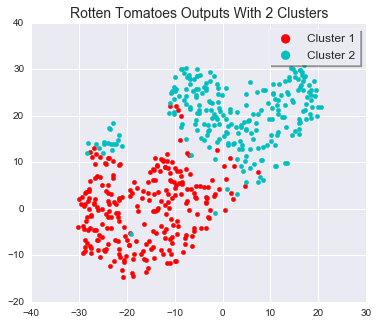

In [325]:
indexes = cluster(2, outputs)

# Black Holes 32 Window

In [181]:
outputs = pd.read_csv("ptb/black_hole_outputs_32.csv", header = None)
outputs.head()


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.747784,-0.355821,0.257005,0.593614,-0.292650,0.668830,0.797932,-0.279753,-0.583877,0.848961,...,-0.112685,0.916028,-0.265551,0.986916,-0.849393,0.518698,0.469101,-0.483706,-0.237020,0.022532
1,0.230298,-0.255611,0.984582,0.534281,0.289811,0.727278,0.930503,-0.454957,-0.507857,0.286510,...,-0.052147,0.878147,-0.275860,0.991078,-0.369667,-0.167688,0.707560,-0.288227,-0.207409,0.118827
2,0.956705,-0.717350,-0.985259,0.500308,-0.656712,-0.934839,-0.655689,-0.050824,0.795964,0.959437,...,-0.911601,0.989277,0.819648,0.941259,-0.993600,0.933783,0.125662,-0.942502,0.814218,0.009199
3,0.904684,-0.898905,-0.984311,0.066477,-0.453474,-0.949633,0.249690,-0.122125,0.883186,0.969269,...,-0.879504,0.992441,0.837954,0.836228,-0.785231,0.895935,0.329365,-0.895758,0.841538,0.012509
4,0.930391,-0.184042,-0.989591,0.762516,-0.614319,-0.758691,-0.580575,-0.008015,0.577472,0.864015,...,-0.872214,0.979319,0.708571,-0.120939,-0.992887,0.508702,0.030025,-0.894059,-0.840087,0.002870


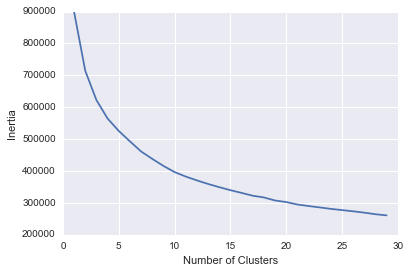

In [76]:
plot_inertia(outputs, 30)

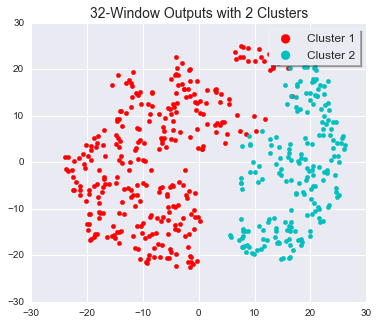

In [229]:
indexes_outputs = cluster(2, outputs)


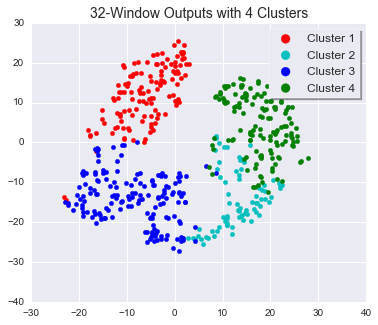

In [235]:
indexes = cluster(4, outputs)

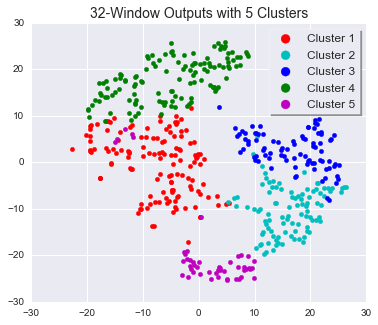

In [236]:
indexes = cluster(5, outputs)

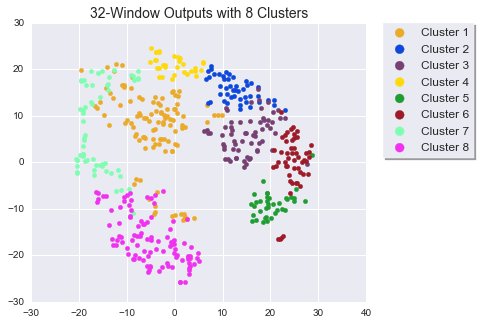

In [294]:
indexes = cluster(8, outputs)

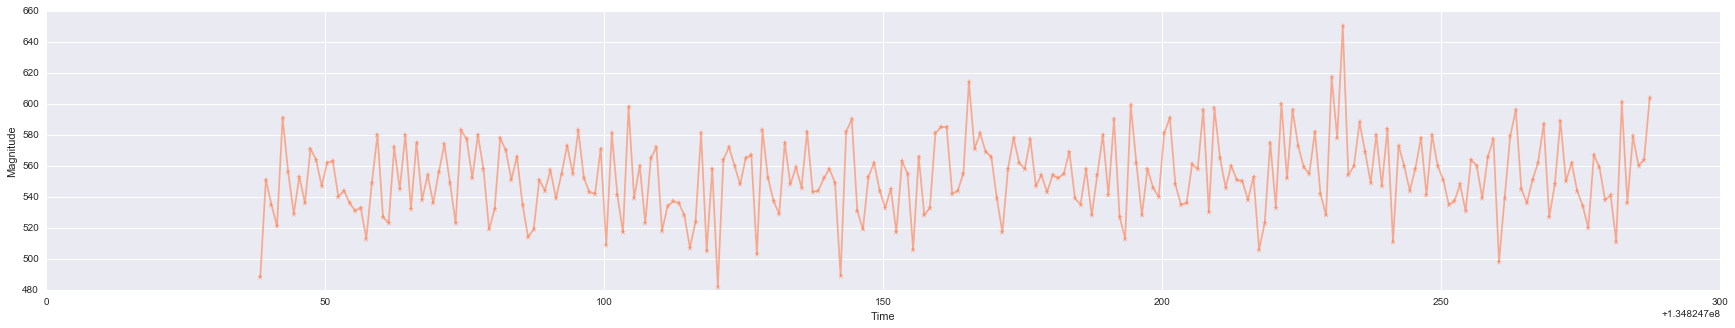

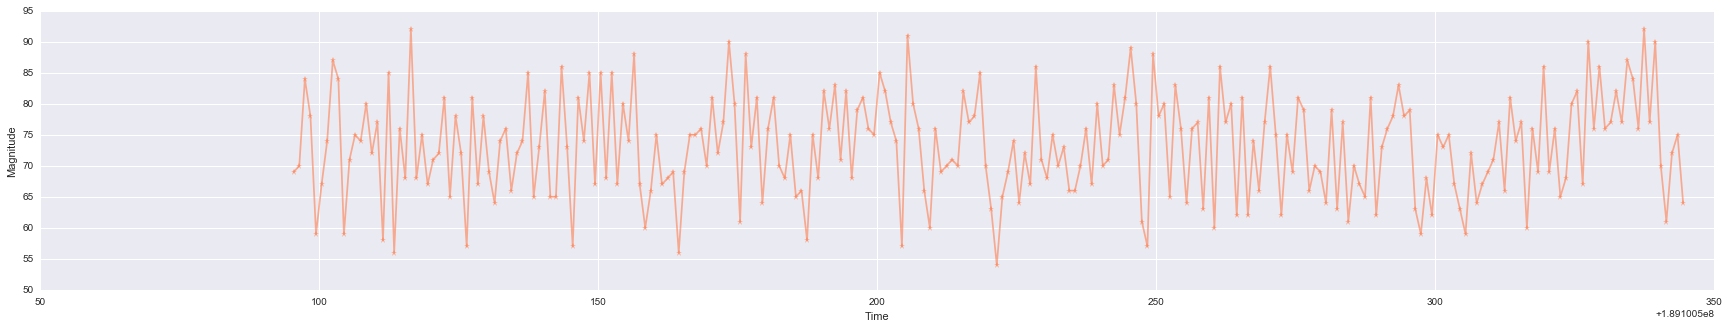

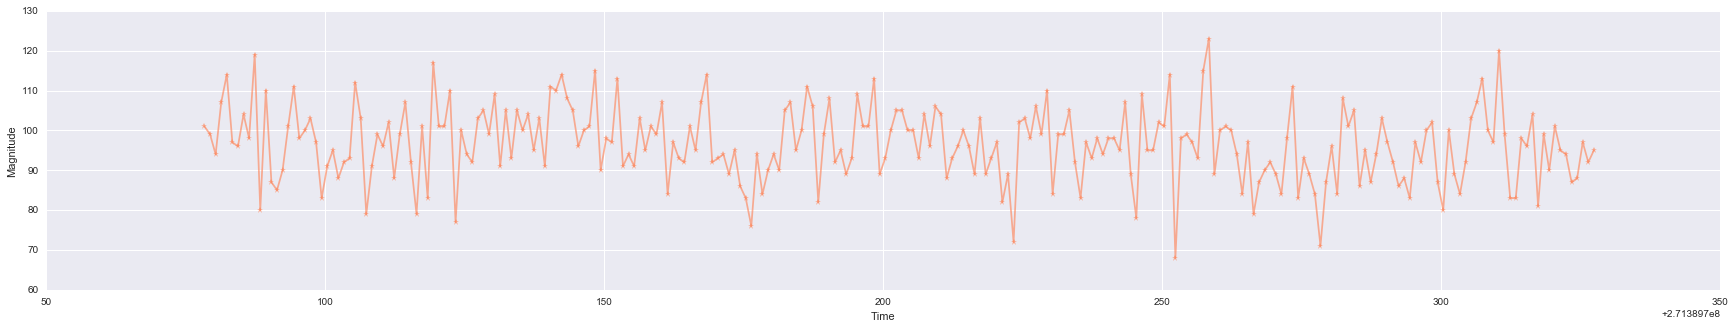

In [303]:
plot_random_sample(indexes[6])

# Black Holes 64 Window

In [123]:
outputs_64 = pd.read_csv("ptb/black_hole_outputs_64.csv", header = None)
outputs_64.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.347884,-0.862034,-0.264518,0.104529,0.424680,0.016626,-0.653921,0.433719,-0.210546,-0.304085,...,-0.486857,-0.285146,0.381777,0.299845,0.296578,-0.223986,-0.320634,-0.172279,0.739197,-0.060310
1,0.361358,-0.915083,-0.231489,0.378441,0.693416,-0.126926,-0.695776,0.454444,-0.355381,-0.212935,...,-0.479889,-0.611800,0.476216,0.128705,0.233783,-0.145261,-0.397143,0.082615,0.864967,-0.017869
2,0.472269,-0.431682,-0.553715,0.131494,0.001739,-0.212588,-0.101267,0.556373,0.011915,0.155644,...,-0.690628,-0.413258,-0.006434,0.537739,0.130460,0.251734,-0.124833,0.363019,0.615876,-0.028257
3,0.261433,-0.518338,-0.532797,0.675612,0.399680,0.138969,-0.142721,0.483814,-0.210899,-0.007785,...,-0.638760,-0.673245,0.505695,0.628921,0.455636,0.257523,0.213519,0.342730,0.522359,0.133086
4,0.030335,-0.667403,-0.637458,-0.119195,-0.037879,-0.131308,-0.412423,0.632092,0.050833,-0.528837,...,-0.526794,0.052932,-0.050382,0.543903,0.080938,-0.049768,-0.207214,-0.462496,0.580319,-0.103736


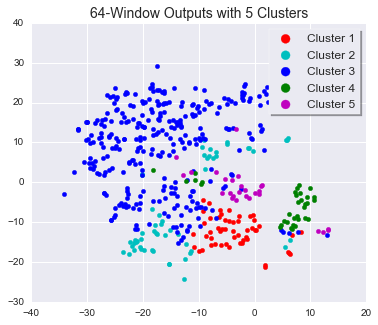

In [313]:
indexes_outputs64 = cluster(5, outputs_64)

# FATS Features

In [55]:
path_to_time_series = "../nicedata_for_daniela/"

times = []
rates = []
errors = []

for filename in sorted(os.listdir(path_to_time_series)):
    #print("Current File Being Processed is: " + filename)
    with fits.open(path_to_time_series+filename, memmap=False) as example:
        hdu = example[1]
        time = hdu.data.field("TIME")
        rate = hdu.data.field("RATE")
        error = hdu.data.field("ERROR")
        times.append(time)
        rates.append(rate)
        errors.append(error)
        del example
        
print(len(times), len(errors), len(rates))



13496 13496 13496


In [180]:
head = ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35', 'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65', 'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0', 'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0', 'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2', 'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_0', 'Freq3_harmonics_rel_phase_1', 'Freq3_harmonics_rel_phase_2', 'Freq3_harmonics_rel_phase_3', 'LinearTrend', 'MaxSlope', 'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 'PairSlopeTrend', 'PercentAmplitude', 'PercentDifferenceFluxPercentile', 'PeriodLS', 'Period_fit', 'Psi_CS', 'Psi_eta', 'Q31', 'Rcs', 'Skew', 'SlottedA_length', 'SmallKurtosis', 'Std', 'StetsonK', 'StetsonK_AC']
df = pd.read_csv("FATS_features/features_1000.csv", names = head)
df.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,FluxPercentileRatioMid20,...,Psi_CS,Psi_eta,Q31,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC
0,328.5,0.379420,1.0,0.323656,9423.082805,163.625419,1.268593e+00,0.000000,1.578487,0.155357,...,0.099539,1.703918,237.0,0.108052,0.025452,1.0,-0.130757,171.183824,0.803425,0.595188
1,221.0,1.000000,3.0,0.006250,0.000002,156.011353,3.615728e+09,0.002088,0.258418,0.151762,...,0.064306,0.525431,151.0,0.064306,13.697982,3.0,209.578808,367.349482,0.371133,0.352287
2,456.0,0.999562,47.0,0.324721,2338.772687,115.728815,5.663617e+00,0.000000,0.977887,0.170410,...,0.284144,0.978571,323.0,0.284144,0.136157,51.0,-0.122669,232.270528,0.807068,0.517589
3,399.0,0.985592,8.0,0.321380,2782.742439,107.792931,4.593173e+00,0.000684,1.196241,0.162722,...,0.233606,1.197058,284.5,0.233606,0.084299,8.0,-0.140195,205.340558,0.804812,0.494004
4,402.0,0.999971,4.0,0.294603,1446.276861,62.002654,1.103539e+01,0.004876,1.168413,0.137574,...,0.117059,1.169289,261.0,0.117059,0.101714,4.0,0.301913,201.301749,0.784396,0.625976


In [79]:
ls

FATS.ipynb               TransformData.ipynb      split_idea.py
FATS_features/           fats_transform.py        tf_kmeans.py
FATS_features_names.txt  project_proposal.pdf     ts_mini_64_10000.csv
Kmeans.ipynb             ptb/
README.md                split_idea.ipynb


In [196]:
data_path = "FATS_features/"
df = pd.DataFrame()
for filename in os.listdir(data_path):
    small_df = pd.read_csv(data_path + filename, header = None)
    df = df.append(small_df)
df.columns = head
df.shape
    

(13496, 59)

In [197]:
df = df.replace('MISSING', np.nan)
df = df.replace('Missing', np.nan)
for col in df.columns.values:
    df[col] = df[col].astype(float)
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)


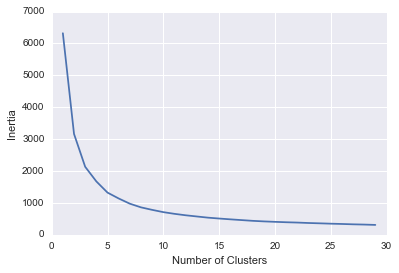

In [74]:
plot_inertia(np.array(df), 30, normalize = True)


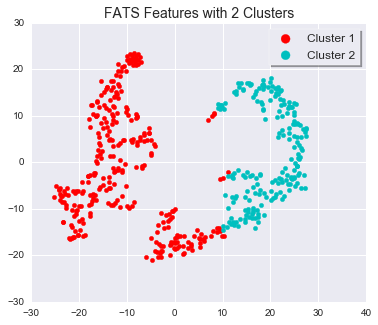

In [222]:
indexes_fats = cluster(2, df, normalize = True)


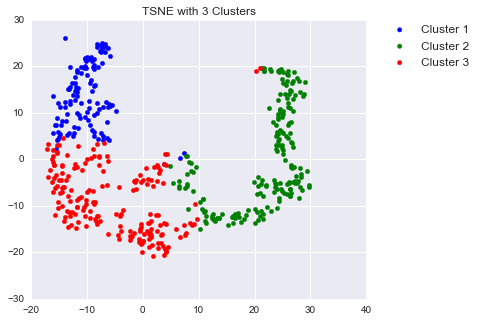

In [86]:
indexes = cluster(3,df, normalize = True)


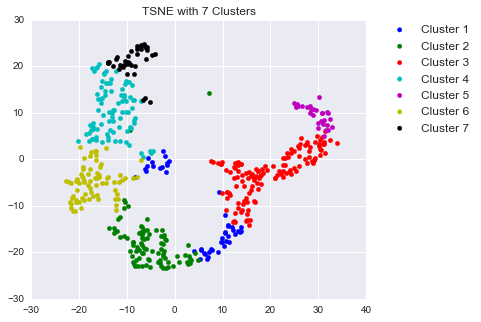

In [133]:
indexes = cluster(7)


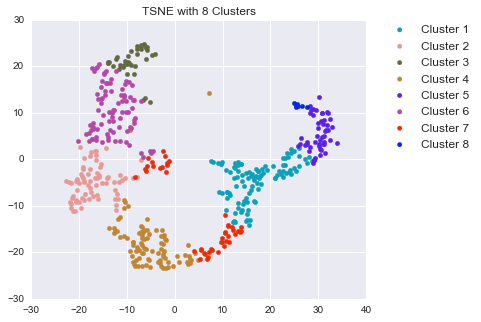

In [155]:
indexes = cluster(8)

# Validation

In [171]:
print(len(indexes_outputs[0]),len(indexes_outputs[1]) )
print(len(indexes_fats[0]),len(indexes_fats[1]))

8328 5171
5016 8480


In [178]:
similar_indexes_1 = list(set(indexes_outputs[0]).intersection(indexes_fats[1]))
len(similar_indexes_1)

5227

In [179]:
similar_indexes_2 = list(set(indexes_outputs[1]).intersection(indexes_fats[0]))
len(similar_indexes_2)

1917

In [198]:
kmeans_outputs = KMeans(n_clusters=2, random_state=0, max_iter = 10000).fit(np.array(outputs))
X = preprocessing.normalize(df)
kmeans_fats = KMeans(n_clusters=2, random_state=0, max_iter = 10000).fit(X)

In [207]:
count = 0
for i in range(kmeans_fats.labels_.shape[0]):
    if kmeans_fats.labels_[i] == kmeans_outputs.labels_[i]:
        count += 1
print(count)

5605


In [107]:
def plot_random_sample(cluster_indexes):
    Color = [ 1 ,0.498039, 0.313725];
    indexes = random.sample(range(1, len(cluster_indexes)), 3)
    for index in indexes:
        plt.figure(figsize=(30,5))
        p = plt.plot(times[index][:250], rates[index][:250], '*-', color=Color, alpha = 0.6)
        plt.xlabel("Time")
        plt.ylabel("Magnitude")
        #plt.gca().invert_yaxis()
        plt.show()

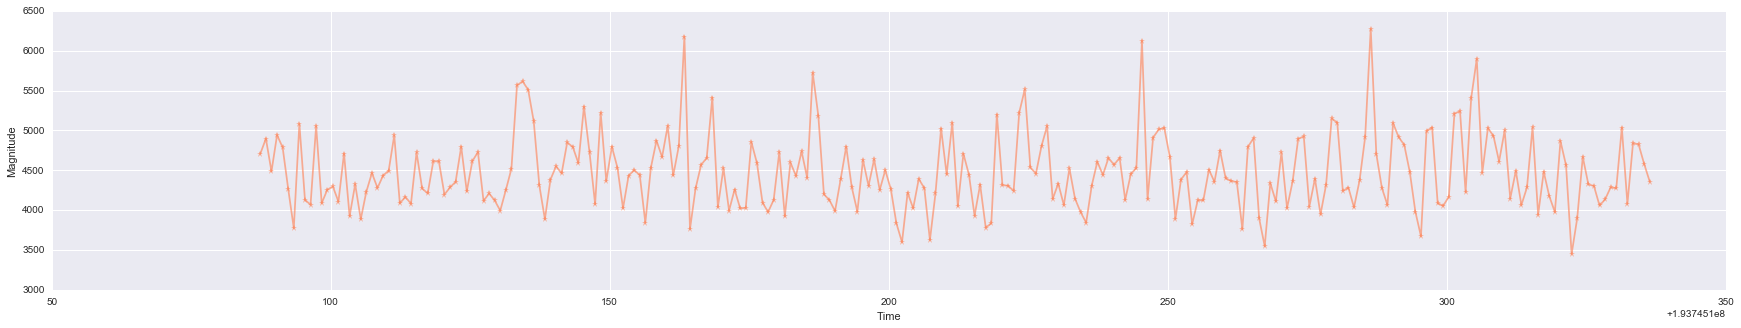

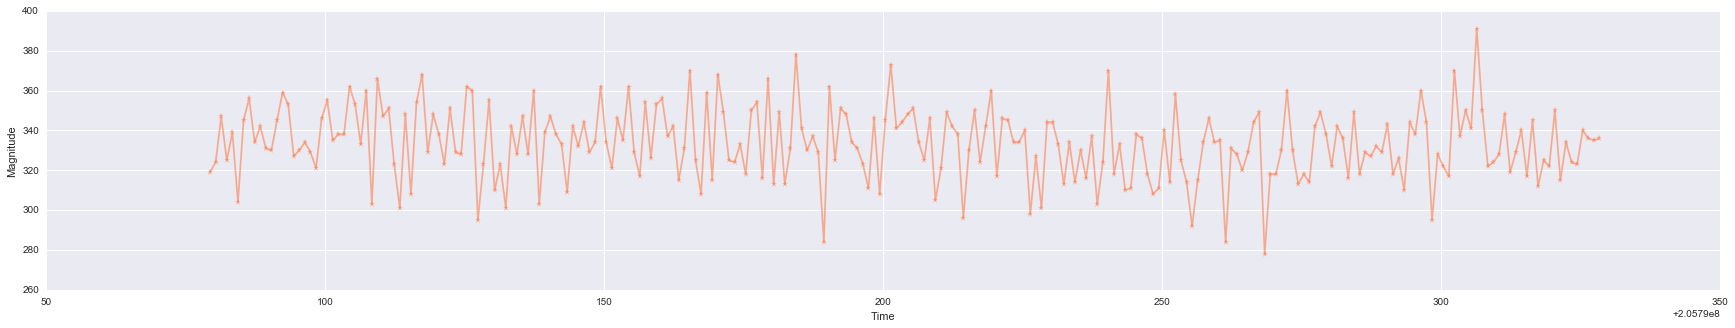

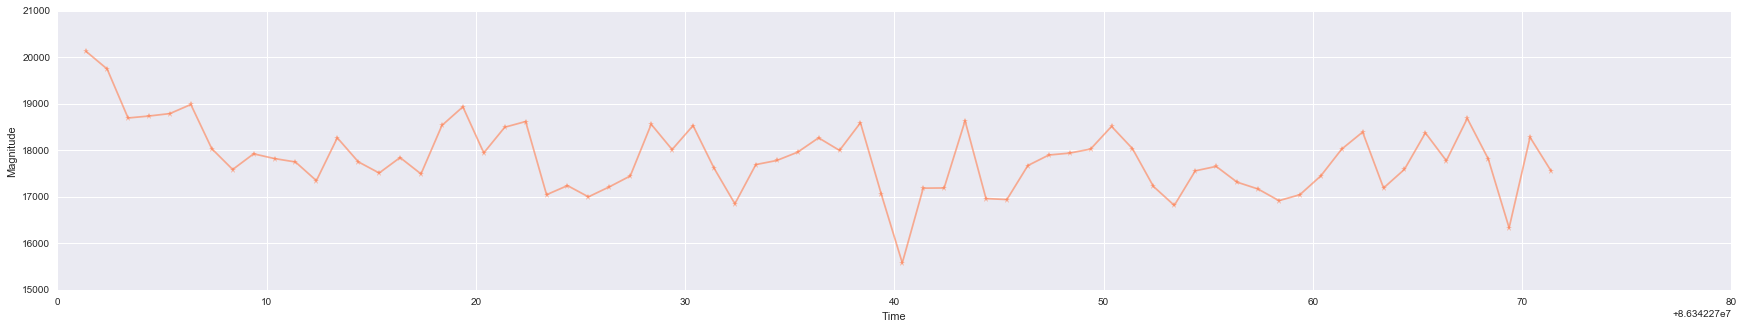

In [115]:
plot_random_sample(indexes_outputs[0])


Gaussian Mixture Model
Histogram plots of FATS features
Scatter plot as two features against each other